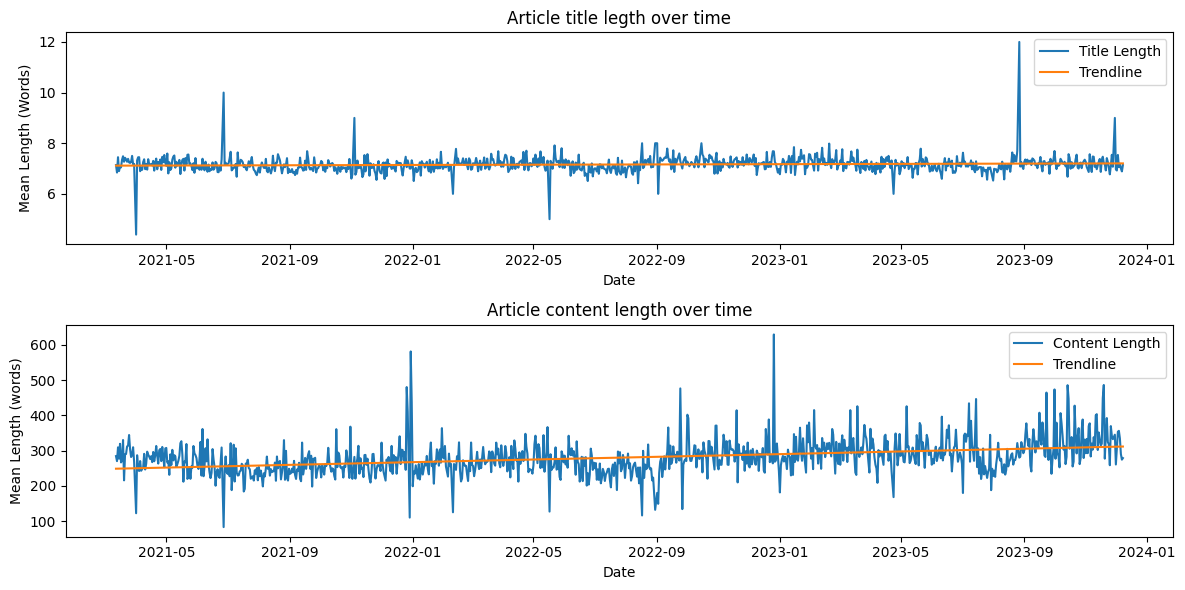

,Kuupäev,Pealkirja Pikkus,Sisu Pikkus,Title Trend,Content Trend
count,988,988.000000,988.000000,988.000000,988.000000
mean,2022-07-25 16:41:17.732793344,7.159326,279.984337,7.159326,279.984337
min,2021-03-12 00:00:00,4.391304,83.000000,7.114939,248.574923
25%,2021-11-16 18:00:00,6.998299,249.254135,7.137132,264.279630
50%,2022-07-24 12:00:00,7.154655,274.364969,7.159326,279.984337
75%,2023-04-02 06:00:00,7.300000,303.799095,7.181519,295.689044
max,2023-12-08 00:00:00,12.000000,629.178571,7.203713,311.393752
std,NaN,0.331031,49.966741,0.025666,18.161791


In [52]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loe JSON-fail
with open('ERR_Artiklid.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Looge tühjad listid pealkirjade ja sisu pikkuste jaoks
titles_length = []
content_length = []
article_dates = []

# Iterateerige JSON-andmete üle
for year, months in data.items():
    for month, days in months.items():
        for day, articles in days.items():
            # Arvuta päeva keskmine pealkirja ja sisu pikkus sõnades
            if articles:
                avg_title_length = sum(len(article['päis'].split()) for article in articles) / len(articles)
                avg_content_length = sum(len(article['sisu'].split()) for article in articles) / len(articles)

                titles_length.append(avg_title_length)
                content_length.append(avg_content_length)
                article_dates.append(f"{year}-{month}-{day}")

# Looge DataFrame
df = pd.DataFrame({'Kuupäev': pd.to_datetime(article_dates), 'Pealkirja Pikkus': titles_length, 'Sisu Pikkus': content_length})

# Sorteeri DataFrame kuupäeva järgi
df = df.sort_values(by='Kuupäev')

# Lisage trendijooned
df['Title Trend'] = np.polyfit(range(len(df)), df['Pealkirja Pikkus'], 1)[0] * range(len(df)) + np.polyfit(range(len(df)), df['Pealkirja Pikkus'], 1)[1]
df['Content Trend'] = np.polyfit(range(len(df)), df['Sisu Pikkus'], 1)[0] * range(len(df)) + np.polyfit(range(len(df)), df['Sisu Pikkus'], 1)[1]

# Loo graafikud
plt.figure(figsize=(12, 6))

# Graafik pealkirjade pikkuse kohta
plt.subplot(2, 1, 1)
plt.plot(df['Kuupäev'], df['Pealkirja Pikkus'], label='Title Length')
plt.plot(df['Kuupäev'], df['Title Trend'], label='Trendline')
plt.title('Article title legth over time')
plt.xlabel('Date')
plt.ylabel('Mean Length (Words)')
plt.legend()

# Graafik sisu pikkuse kohta
plt.subplot(2, 1, 2)
plt.plot(df['Kuupäev'], df['Sisu Pikkus'], label='Content Length')
plt.plot(df['Kuupäev'], df['Content Trend'], label='Trendline')
plt.title('Article content length over time')
plt.xlabel('Date')
plt.ylabel('Mean Length (words)')
plt.legend()

plt.tight_layout()
plt.show()
df.describe()


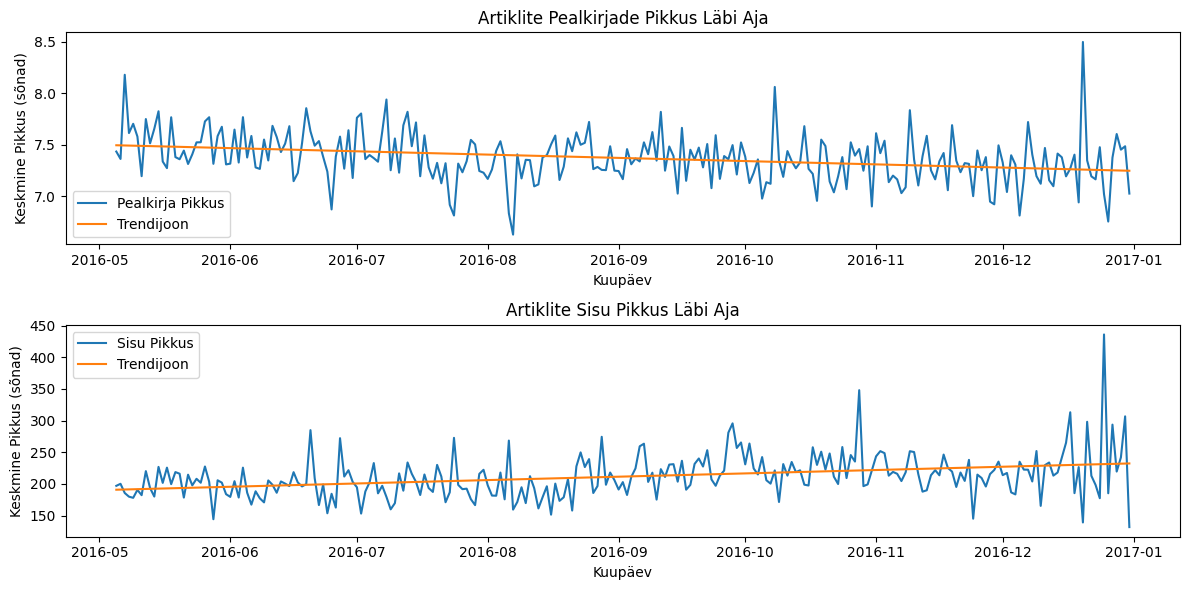

                   Kuupäev  Pealkirja Pikkus  Sisu Pikkus  Title Trend  \
count                  241        241.000000   241.000000   241.000000   
mean   2016-09-02 00:00:00          7.371281   211.488924     7.371281   
min    2016-05-05 00:00:00          6.626263   131.696203     7.247305   
25%    2016-07-04 00:00:00          7.226667   190.462766     7.309293   
50%    2016-09-02 00:00:00          7.359116   207.994186     7.371281   
75%    2016-11-01 00:00:00          7.514286   226.476510     7.433270   
max    2016-12-31 00:00:00          8.500000   436.018868     7.495258   
std                    NaN          0.246138    34.994400     0.072025   

       Content Trend  
count     241.000000  
mean      211.488924  
min       190.747851  
25%       201.118387  
50%       211.488924  
75%       221.859460  
max       232.229996  
std        12.049681  


In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loe JSON-fail
with open('ERR_Artiklid_2016.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Looge tühjad listid pealkirjade ja sisu pikkuste jaoks
titles_length = []
content_length = []
article_dates = []

# Määra soovitud aasta
target_year = 2016

# Iterateerige JSON-andmete üle
if str(target_year) in data:
    for month, days in data[str(target_year)].items():
        for day, articles in days.items():
            # Arvuta päeva keskmine pealkirja ja sisu pikkus sõnades
            if articles:
                avg_title_length = sum(len(article['päis'].split()) for article in articles) / len(articles)
                avg_content_length = sum(len(article['sisu'].split()) for article in articles) / len(articles)

                titles_length.append(avg_title_length)
                content_length.append(avg_content_length)
                article_dates.append(f"{target_year}-{month}-{day}")

    # Looge DataFrame
    df = pd.DataFrame({'Kuupäev': pd.to_datetime(article_dates), 'Pealkirja Pikkus': titles_length, 'Sisu Pikkus': content_length})

    # Sorteeri DataFrame kuupäeva järgi
    df = df.sort_values(by='Kuupäev')

    # Lisage trendijooned
    title_coefficients = np.polyfit(range(len(df)), df['Pealkirja Pikkus'], 1, rcond=None, full=False, w=None, cov=False)
    df['Title Trend'] = title_coefficients[0] * range(len(df)) + title_coefficients[1]

    content_coefficients = np.polyfit(range(len(df)), df['Sisu Pikkus'], 1, rcond=None, full=False, w=None, cov=False)
    df['Content Trend'] = content_coefficients[0] * range(len(df)) + content_coefficients[1]

    # Loo graafikud
    plt.figure(figsize=(12, 6))

    # Graafik pealkirjade pikkuse kohta
    plt.subplot(2, 1, 1)
    plt.plot(df['Kuupäev'], df['Pealkirja Pikkus'], label='Pealkirja Pikkus')
    plt.plot(df['Kuupäev'], df['Title Trend'], label='Trendijoon')
    plt.title('Artiklite Pealkirjade Pikkus Läbi Aja')
    plt.xlabel('Kuupäev')
    plt.ylabel('Keskmine Pikkus (sõnad)')
    plt.legend()

    # Graafik sisu pikkuse kohta
    plt.subplot(2, 1, 2)
    plt.plot(df['Kuupäev'], df['Sisu Pikkus'], label='Sisu Pikkus')
    plt.plot(df['Kuupäev'], df['Content Trend'], label='Trendijoon')
    plt.title('Artiklite Sisu Pikkus Läbi Aja')
    plt.xlabel('Kuupäev')
    plt.ylabel('Keskmine Pikkus (sõnad)')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    # Kuvatakse ka DataFrame'i üldine statistika
    print(df.describe())
else:
    print(f"Andmetes pole aastat {target_year}.")


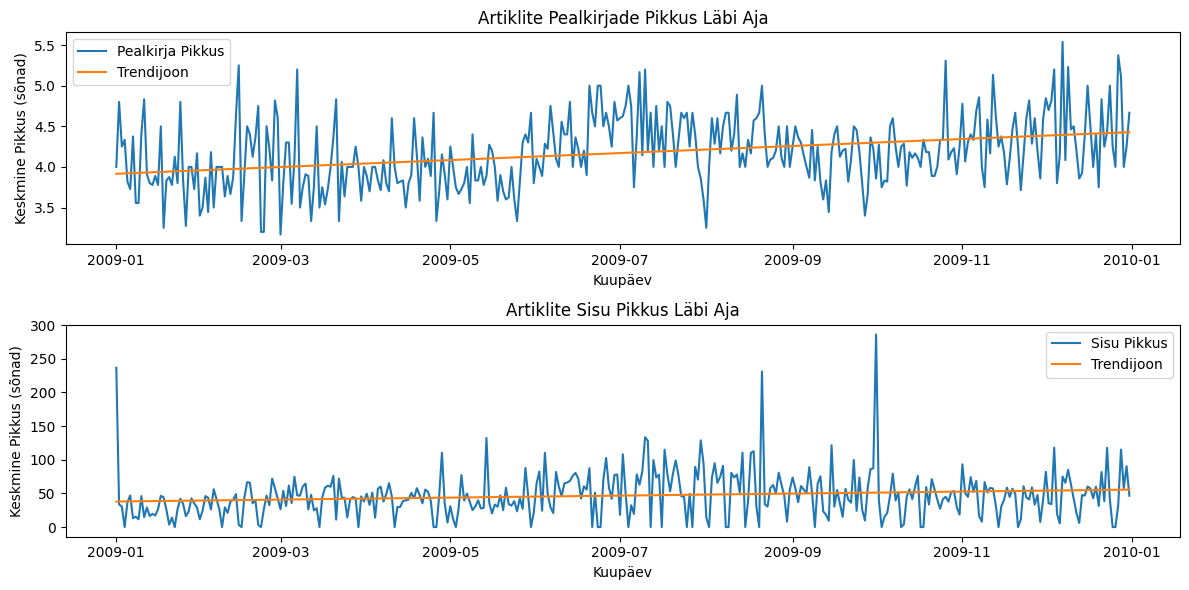

                   Kuupäev  Pealkirja Pikkus  Sisu Pikkus  Title Trend  \
count                  365        365.000000   365.000000   365.000000   
mean   2009-07-02 00:00:00          4.171712    46.820824     4.171712   
min    2009-01-01 00:00:00          3.166667     0.000000     3.915510   
25%    2009-04-02 00:00:00          3.857143    26.500000     4.043611   
50%    2009-07-02 00:00:00          4.153846    43.625000     4.171712   
75%    2009-10-01 00:00:00          4.461538    60.615385     4.299812   
max    2009-12-31 00:00:00          5.538462   286.142857     4.427913   
std                    NaN          0.432055    34.215487     0.148528   

       Content Trend  
count     365.000000  
mean       46.820824  
min        37.967859  
25%        42.394341  
50%        46.820824  
75%        51.247307  
max        55.673790  
std         5.132320  


In [54]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loe JSON-fail
with open('ERR_Artiklid_2009.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Looge tühjad listid pealkirjade ja sisu pikkuste jaoks
titles_length = []
content_length = []
article_dates = []

# Määra soovitud aasta
target_year = 2009

# Iterateerige JSON-andmete üle
if str(target_year) in data:
    for month, days in data[str(target_year)].items():
        for day, articles in days.items():
            # Arvuta päeva keskmine pealkirja ja sisu pikkus sõnades
            if articles:
                avg_title_length = sum(len(article['päis'].split()) for article in articles) / len(articles)
                avg_content_length = sum(len(article['sisu'].split()) for article in articles) / len(articles)

                titles_length.append(avg_title_length)
                content_length.append(avg_content_length)
                article_dates.append(f"{target_year}-{month}-{day}")

    # Looge DataFrame
    df = pd.DataFrame({'Kuupäev': pd.to_datetime(article_dates), 'Pealkirja Pikkus': titles_length, 'Sisu Pikkus': content_length})

    # Sorteeri DataFrame kuupäeva järgi
    df = df.sort_values(by='Kuupäev')

    # Lisage trendijooned
    title_coefficients = np.polyfit(range(len(df)), df['Pealkirja Pikkus'], 1, rcond=None, full=False, w=None, cov=False)
    df['Title Trend'] = title_coefficients[0] * range(len(df)) + title_coefficients[1]

    content_coefficients = np.polyfit(range(len(df)), df['Sisu Pikkus'], 1, rcond=None, full=False, w=None, cov=False)
    df['Content Trend'] = content_coefficients[0] * range(len(df)) + content_coefficients[1]

    # Loo graafikud
    plt.figure(figsize=(12, 6))

    # Graafik pealkirjade pikkuse kohta
    plt.subplot(2, 1, 1)
    plt.plot(df['Kuupäev'], df['Pealkirja Pikkus'], label='Pealkirja Pikkus')
    plt.plot(df['Kuupäev'], df['Title Trend'], label='Trendijoon')
    plt.title('Artiklite Pealkirjade Pikkus Läbi Aja')
    plt.xlabel('Kuupäev')
    plt.ylabel('Keskmine Pikkus (sõnad)')
    plt.legend()

    # Graafik sisu pikkuse kohta
    plt.subplot(2, 1, 2)
    plt.plot(df['Kuupäev'], df['Sisu Pikkus'], label='Sisu Pikkus')
    plt.plot(df['Kuupäev'], df['Content Trend'], label='Trendijoon')
    plt.title('Artiklite Sisu Pikkus Läbi Aja')
    plt.xlabel('Kuupäev')
    plt.ylabel('Keskmine Pikkus (sõnad)')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    # Kuvatakse ka DataFrame'i üldine statistika
    print(df.describe())
else:
    print(f"Andmetes pole aastat {target_year}.")
